In [117]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import quad

plt.rcParams.update({
	'text.usetex': True,
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'axes.labelweight': 'normal',
	'axes.linewidth': 1.5,
	'xtick.major.width': 1.5,
	'xtick.major.size': 10.0,
	'xtick.minor.size': 5.0,
	'ytick.major.width': 1.5,
	'ytick.major.size': 10.0,
	'ytick.minor.size': 5.0,
	'font.size': 30,
    'figure.figsize' : (10,6)})
plt.rcParams.update({'font.size': 20})


In [118]:
kb = 1.380649e-23#J/K
T = 3 #K
bmu = 30
mu = bmu*T*kb

C = 1 # normalisation constant  C = A*sqrt(mu)

def pdf(x):
    return C*np.sqrt(x)/(np.exp(bmu*(x-1))+1)

$$f(\epsilon) = A\,\frac{\sqrt{\epsilon}}{\exp(\beta\,(\epsilon - \mu))+1}$$
$$ x = \frac{\epsilon}{\mu} \hspace{1cm} C = A\cdot\sqrt{\mu} \hspace{1cm} \beta\cdot\mu = 30$$

$$pdf(x) = C\,\frac{\sqrt{x}}{\exp(30(x - 1))+1}$$


# Task 1

## a)

In [119]:
I = quad(pdf,0,20)
print(I)
C = 1/I[0]

(0.667581404941691, 4.166195166632747e-10)


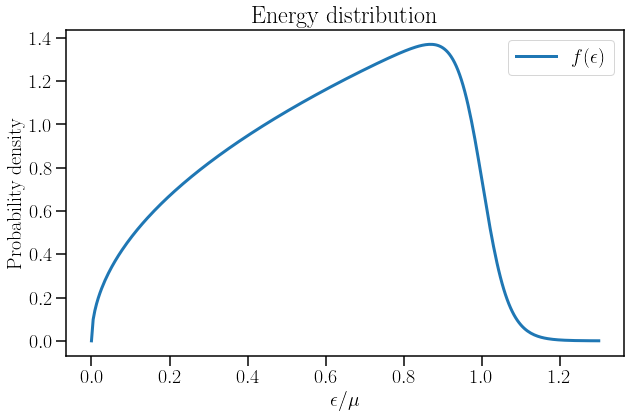

In [120]:
# Distribution
xmax = 1.3
xx = np.linspace(0,xmax,300)
fy = pdf(xx)
plt.plot(xx,fy,label=r'$f(\epsilon)$',lw=3)

plt.title("Energy distribution")
plt.xlabel(r'$\epsilon/\mu$')
plt.ylabel(r"Probability density")
plt.legend()
plt.show()

Montecarlo integration method

In [121]:
# Integration of func with MC method, return the value of the integral and the estimated error
def IntMC(func, xmin, xmax, N): 
    x = np.random.rand(N)*xmax + xmin
    y = func(x)
    mean = y.sum()/N # Mean value of y
    var= (y**2).sum()/N - mean**2 # Variance of y
    I = mean*(xmax-xmin) # Value of the integral
    dI = (xmax-xmin)*np.sqrt(var/N) # Estimation of the error
    return (I,dI)

In [122]:
IntMC(pdf,0,20,int(1e7))

(0.9999302536433021, 0.001415162809987582)

We have thath $\int f(\epsilon)\,d\epsilon = 1$ and $f(\epsilon)>0 \, \forall \epsilon $, so it's a pdf

The momentums are :

In [123]:
mean = IntMC(lambda x:x*pdf(x),0,10,int(1e7)) #mu1
var = IntMC(lambda x:(x-mean[0])**2*pdf(x),0,10,int(1e7)) #mu2
mu3 = IntMC(lambda x:(x-mean[0])**3*pdf(x),0,10,int(1e7))
mu4 = IntMC(lambda x:(x-mean[0])**4*pdf(x),0,10,int(1e7))

In [124]:
skewness = mu3[0]/np.sqrt(var[0]**3)
kurtosis = mu4[0]/var[0]**2 - 3
print('mean =', mean,
      '\nvar =', var,
      '\nmu3 =', mu3,
      '\nmu4 =', mu4,
      '\nskewness =', skewness,
      '\nkurtosis =', kurtosis)

mean = (0.6024632653815706, 0.000678760225273029) 
var = (0.07101156916341124, 7.908492973184608e-05) 
mu3 = (-0.00515040891504762, 3.251800810220532e-05) 
mu4 = (0.010444731154531728, 1.389968359440911e-05) 
skewness = -0.2721748842205172 
kurtosis = -0.9287188786444047


## b)

Number of data in =  55417
Efficicency =  0.55417


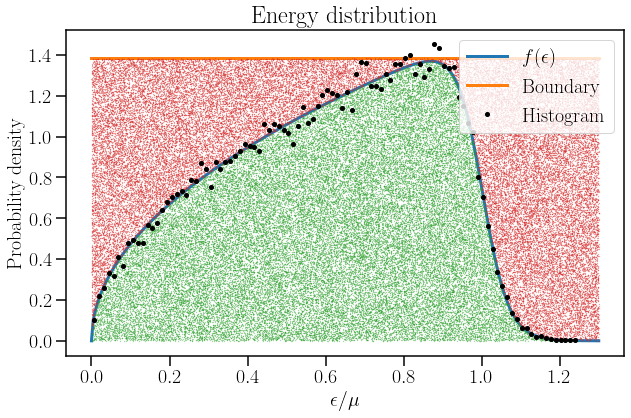

In [126]:
# Distribution
xmax = 1.3
xx = np.linspace(0,xmax,300)
fy = pdf(xx)
plt.plot(xx,fy,label=r'$f(\epsilon)$',lw=3)

# Boudary function
ymax = max(fy)*1.01
plt.plot(xx,ymax*np.ones_like(xx),lw=3,label='Boundary')
eff = 1/(xmax*ymax)

#Monte Carlo generation
N_MC=int(1e5)
xi = np.random.rand(N_MC)*xmax
yi = np.random.rand(N_MC)*ymax
accepted  = (yi<=pdf(xi))
i_in = accepted.nonzero()
i_out = (1-accepted).nonzero()
plt.plot(xi[i_in],yi[i_in],'.',alpha=0.7,ms=0.5)
plt.plot(xi[i_out],yi[i_out],'.',alpha=0.7,ms=0.5)
print('Number of data in = ',len(xi[i_in]))
print('Efficicency = ',len(xi[i_in])/N_MC)
data = xi[i_in]

nbins = 100
hist,bins= np.histogram(data,nbins,density=True)
plt.plot(bins[:-1]+(bins[-1]/nbins)/2,hist,'ok',ms=4,label='Histogram')


plt.title("Energy distribution")
plt.xlabel(r'$\epsilon/\mu$')
plt.ylabel(r"Probability density")
plt.legend()
plt.show()

## c) d) e)

In [127]:
mm = np.mean(data)
vv = np.var(data)
ss = stats.skew(data)
kk = stats.kurtosis(data)

print("mean = ", mm, "\nvariance = ", vv , "\nskewness = ", ss , "\nkurtosis = ", kk)

mean =  0.6042846461393175 
variance =  0.07047329672871683 
skewness =  -0.285308649919136 
kurtosis =  -0.9103575649739035


In [128]:
mean_th = 3/5
print('Theorical mean =', mean_th)
print('Relative error =', np.abs(1-mm/mean_th))
print('E(e)/(k_B T) =', mm*30)

Theorical mean = 0.6
Relative error = 0.007141076898862675
E(e)/(k_B T) = 18.128539384179525


We can estimate the error on this values by doing severals MC experiments with the same number of events

In [112]:
def MCgen(pdf, xmin, xmax, ymax, N):
    p = 1/((xmax-xmin)*ymax) # Probability that an event is recorded
    Nrand = int(N/(p-0.001))
    x = np.random.rand(Nrand)*(xmax-xmin) + xmin
    y = np.random.rand(Nrand)*ymax
    data = x[np.where(y<=pdf(x))]
    return data

In [113]:
def MCgenFix(pdf, xmin, xmax, ymax, N):
    p = 1/((xmax-xmin)*ymax) # Probability that an event is recorded
    Nrand = int(N/(p-0.001)) 
    ok = 0
    while ok == 0 :
        x = np.random.rand(Nrand)*(xmax-xmin) + xmin
        y = np.random.rand(Nrand)*ymax
        data = x[np.where(y<=pdf(x))]
        if len(data)>=N:
            ok = 1
    data = data[:N]
    return data

In [129]:
mi = []
vi = []
si = []
ki = []
for i in range(1000):
    xi = MCgenFix(pdf,0,xmax,ymax,len(data))
    mi.append(np.mean(xi))
    vi.append(np.var(xi))
    si.append(stats.skew(xi))
    ki.append(stats.kurtosis(xi))
    
dm = np.sqrt(np.var(mi))
dv = np.sqrt(np.var(vi))
ds = np.sqrt(np.var(si))
dk = np.sqrt(np.var(ki))


print("E_mean = ", dm, "\nE_variance = ", dv , "\nE_skewness = ", ds , "\nE_kurtosis = ", dk)

E_mean =  0.001132904919131274 
E_variance =  0.0003101481615207806 
E_skewness =  0.006323452305821906 
E_kurtosis =  0.007906197083120379


# Task 2

## a) 

Let's check that the mean of data converges to the mean of the distribution

In [220]:
mean_quad = quad(lambda x: x*pdf(x),0,15)
print(mean_quad)

(0.6032832446197522, 7.322473743836188e-09)


In [221]:
data = MCgen(pdf,0,1.3,ymax,int(1e5))
mean_n= np.cumsum(data)/(np.arange(len(data))+1)

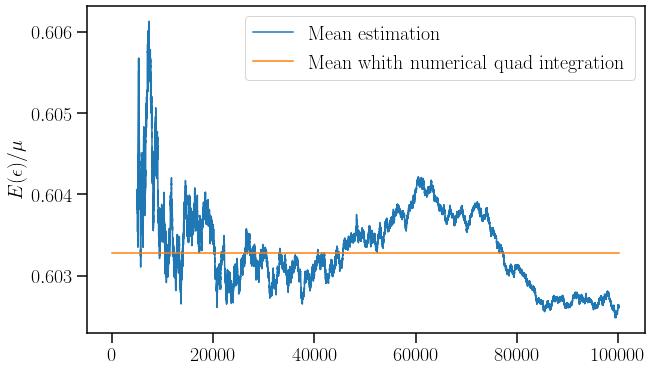

In [222]:
nmin = int(5e3)
plt.plot(np.arange(nmin,len(mean_n)),mean_n[nmin:],label="Mean estimation")
plt.plot([0,len(data)],mean_quad[0]*np.ones(2),label='Mean whith numerical quad integration')
plt.ylabel(r'$E(\epsilon)/\mu$')

plt.legend()
plt.show()

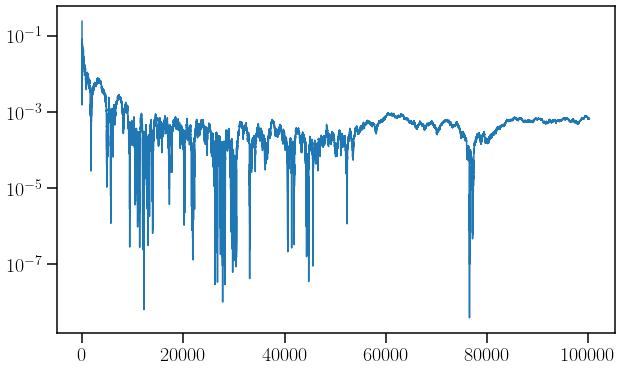

In [223]:
abserror = abs(mean_n - mean_quad[0])
plt.semilogy(abserror)

## b)

In [213]:
Nexp = int(1e5)
NN = int(1e2)
mean_b = []
for n in range(Nexp):
    xn = MCgen(pdf,0,1.3,ymax,NN)
    mean_b.append(np.mean(xn))
mean_b = np.array(mean_b)

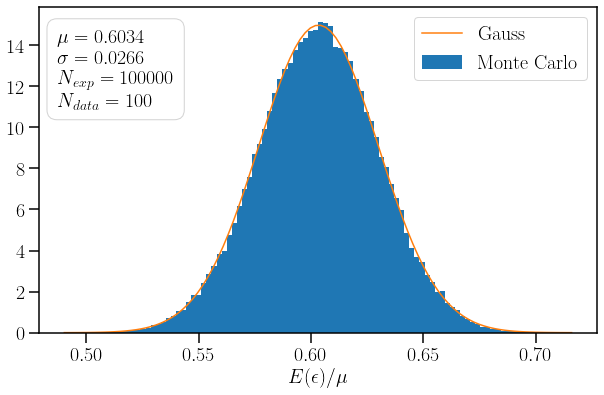

In [219]:
mean_b = np.array(mean_b)
mm =mean_b.mean()
ms = mean_b.std()
plt.hist(mean_b,100,density=True,label='Monte Carlo')
plt.figtext(0.15,0.65, '$\mu = %0.4f$'%mm+
            '\n$\sigma = %0.4f$'%ms+
            '\n$N_{exp} = %i$'%Nexp+
            '\n$N_{data} = %i$'%NN
            ,bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round', pad=0.5))

def gauss(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
xx = np.linspace(mean_b.min(),mean_b.max(),100)
plt.plot(xx,gauss(xx,mm,ms), label = 'Gauss')

plt.xlabel(r'$E(\epsilon)/\mu$')
plt.legend()
plt.show()